# Clustering Algorithm

In [ ]:
# importing libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# import PCA 
from sklearn.decomposition import PCA

# kmeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# CHECKING THE WORKING DIRECTORY
os.getcwd()

'C:\\Users\\User\\Desktop\\Github\\Country-Clustering'

In [3]:
# read pickle file as dataframe
df = pd.read_pickle('country_df.pkl')

In [4]:
# CHECKING THE ROWS AND COLUMNS OF THE DATASET
df.shape

(167, 10)

In [5]:
# eliminate the column that contains the country information, as only numeric values should be used in this case for unsupervised learning
dataset = df.drop(['country'], axis =1)
dataset.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Scaling
Why scale the data in this case?

the features have incomparable units (metrics are percentages, dollar values, whole numbers)
the range values of the features also vary (one for example is 0 to 200, and another 0 to 100,000)
this level of variance can negatively impact the performance of this model,as this model is based on measuring distances, it can do this by giving more weight to some features
by scaling we are removing potential bias that the model can have towards features with higher magnitudes

In [6]:
# columns argument ==> we'll use this later to create a new dataframe with the rescaled data 
columns = dataset.columns

In [7]:
#Scale the data: MinMaxScaler (normalised)

# the scaler to use will be 
scaler = MinMaxScaler()

# 'scaler' is for the rescaling technique, 'fit' function is to find the x_min and the x_max, 'transform' function applies formula to all elements of data
rescaled_dataset_minmax = scaler.fit_transform(dataset)
rescaled_dataset_minmax

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [8]:
#Scale the data: StandardScaler (standardised)
# in standardisation, all features will be transformed to have the properties of standard normal distribution with mean=0 and standard deviation=1
# the scaler to use will be 
scaler = StandardScaler()

# 'scaler' is for the rescaling technique, 'fit' function is to find the x_min and the x_max, 'transform' function applies formula to all elements of data
rescaled_dataset_standard = scaler.fit_transform(dataset)
rescaled_dataset_standard

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [9]:
#Scaled dataframes
# minmax
# we need to create a new dataframe with the column lables and the rescaled values 
df_minmax = pd.DataFrame(data= rescaled_dataset_minmax , columns = columns )
df_minmax

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


In [10]:
# standardisation
# we need to create a new dataframe with the column lables and the rescaled values 
df_standard = pd.DataFrame(data= rescaled_dataset_standard , columns = columns)
df_standard

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## PCA: Principal Component Analysis
PCA with data scaled with StandardScaler

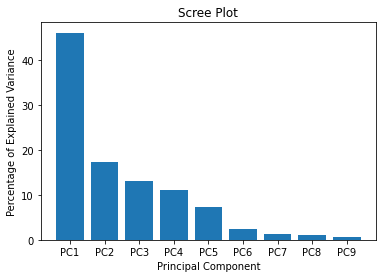

In [11]:
# fit and transform
pca = PCA()
pca.fit(df_standard)
pca_data_standard = pca.transform(df_standard)

# percentage variation 
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# plot pca
pca_df_standard = pd.DataFrame(pca_data_standard, columns = labels)

## PCA with data scaled with MinMaxScaler


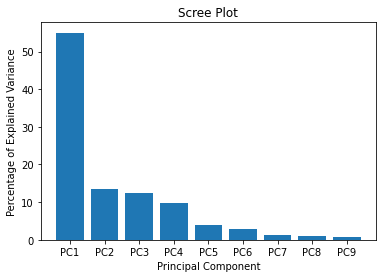

In [12]:
# fit and transform
pca = PCA()
pca.fit(df_minmax)
pca_data_minmax = pca.transform(df_minmax)

# percentage variation 
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# plot pca
pca_df_minmax = pd.DataFrame(pca_data_minmax, columns = labels)

In [13]:
# dataframe with PC1, PC2, P3, PC4
data2 = pca_df_standard.drop(['PC5','PC6','PC7','PC8','PC9'], axis = 1)
data2.head()

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


In [14]:
# dataframe with PC1, PC2, P3, PC4
data3 = pca_df_minmax.drop(['PC5','PC6','PC7','PC8','PC9'], axis = 1)
data3.head()

,PC1,PC2,PC3,PC4
0,-0.599078,0.095490,0.157554,-0.024333
1,0.158474,-0.212092,-0.064189,-0.061247
2,0.003686,-0.135867,-0.134182,0.133574
3,-0.650235,0.275975,-0.142672,0.156018
4,0.200711,-0.064662,-0.100715,-0.037902


### OBSERVATIONS

After doing PCA with both standardised and normalised versions of the original dataset, we can see that there are 4 principal components can explain about 90% of the distribution of the original data.

## Model: K-Means Clustering

In [15]:
km = KMeans (
    n_clusters = 3, 
    init = 'random', 
    n_init = 10,
    max_iter = 300,
    tol = 1e-4,
    random_state = 0 
)

## Run model with different versions of the dataset

In [16]:
# normalised dataset
# method to compute the clusters and assign the labels
y_predicted_minmax = km.fit_predict(df_minmax) # fit_predict --> Compute cluster centers and predict cluster index for each sample.
y_predicted_minmax

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [17]:
# standardised dataset
# method to compute the clusters and assign the labels
y_predicted_standard = km.fit_predict(df_standard) # fit_predict --> Compute cluster centers and predict cluster index for each sample.
y_predicted_standard

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [18]:
# data2 is the original dataset with standard scaling and 4 principal components found with PCA
# method to compute the clusters and assign the labels
y_predicted_data2 = km.fit_predict(data2) # fit_predict --> Compute cluster centers and predict cluster index for each sample.
y_predicted_data2

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [19]:
# data2 is the original dataset with standard scaling and 4 principal components found with PCA
# method to compute the clusters and assign the labels
y_predicted_data3 = km.fit_predict(data3) # fit_predict --> Compute cluster centers and predict cluster index for each sample.
y_predicted_data3

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [20]:
# add the cluster column to the dataframe 
df_minmax['cluster'] = y_predicted_minmax
df_minmax.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0


In [21]:
# add the cluster column to the dataframe 
df_standard['cluster'] = y_predicted_standard
df_standard.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0


In [22]:
# add the cluster column to the dataframe (dataset does not include feature 'country')
dataset['cluster'] = y_predicted_data2
dataset.head()
## NOTE: we are adding CLUSTERS LABELLED FOR THE PCA DATAFRAME AND ADDING THESE CLUSTERS TO THE ORIGINAL DATAFRAME WITHOUTH COUNTRY COLUMN

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


## Optimal number of clusters: Elbow Method

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

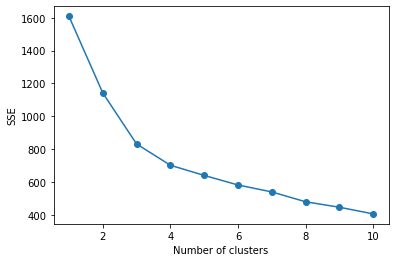

In [23]:
# calculate Sum of Squared Errors (SSE), also called distorsions,  
#for a range of number of cluster - with df scaled with StandardScaler

sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_standard)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

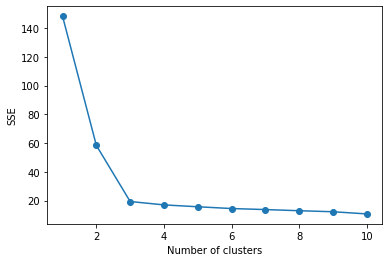

In [24]:
# calculate Sum of Squared Errors (SSE), also called distorsions, 
#for a range of number of cluster - with df scaled with MinMax

sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_minmax)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

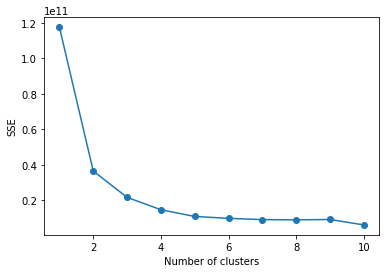

In [25]:
# calculate Sum of Squared Errors (SSE), also called distorsions, for a range of number of cluster - with df scaled with StandardScaler + PCA
sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(dataset)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

## OBSERVATIONS

After running the K-Means model with the a normalised dataset, a standardised dataset, and a PCA with 4 components (with standardised scaling) we can see that the optimal number of clusters is still 3 with different levels of inertia. Two clusters could also be considered as per results of dataset after PCA.

## Optimal number of clusters: Silhouette Method
    
#### With standardised data


In [26]:
# calculate Silhoutte Score - stardardised
score = silhouette_score(df_standard, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

# A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters.

Silhouette Score: 0.017


#### With normalised data

In [27]:
# Calculate Silhoutte Score - normalised
score = silhouette_score(df_minmax, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

# # A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters.

Silhouette Score: -0.013


#### With standardised data + PCA

In [28]:
# Calculate Silhoutte Score - stardardised + PCA
score = silhouette_score(dataset, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.489


## OBSERVATIONS

Silhouette Scores are very close to 0 indicating that clusters are overlapping. An increase in clusters (to 5 for example) shows that there are negative values in the scale, meaning that this n of clusters might have samples that have been assigned to the wrong cluster

## Cluster characteristics

In [29]:
# add cluster column to original dataset with countries and non-scaled values
df['cluster'] = y_predicted_standard.tolist()
data = df
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [30]:
# table of clusters showing mean values per cluster and per feature
clusters_table = pd.pivot_table(data, index=['cluster'])
clusters_table

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
cluster,,,,,,,,,
0,21.927381,40.243917,6486.452381,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500
1,92.961702,29.151277,1922.382979,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085
2,5.000000,58.738889,42494.444444,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778


In [31]:
# cluster 0 
cluster_0 = data.loc[data['cluster'] == 0]

# list of countries in this country
cluster_0.country.unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia',
       'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic',
       'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR',
       'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.',
       'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal',
       'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
       'Seychelles', 'Solomon Islands', 'Sri Lanka',
       'St. Vincent and the Grenadines'

In [32]:
# cluster 1 
cluster_1 = data.loc[data['cluster'] == 1]

# list of countries in this country
cluster_1.country.unique()

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)

In [33]:
# cluster 2 
cluster_2 = data.loc[data['cluster'] == 2]

# list of countries in this country
cluster_2.country.unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada',
       'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

<AxesSubplot:xlabel='income', ylabel='child_mort'>

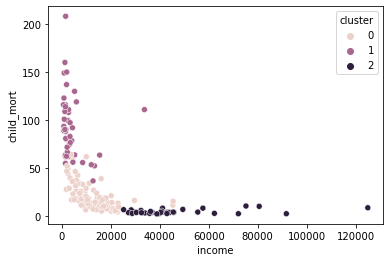

In [34]:
# plotting the clusters with seaborn
sns.scatterplot(x="income", y="child_mort", hue="cluster", data=data)

<AxesSubplot:xlabel='income', ylabel='inflation'>

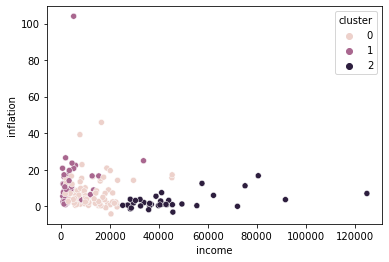

In [35]:
# plotting the clusters with seaborn
sns.scatterplot(x="income", y="inflation", hue="cluster", data=data)

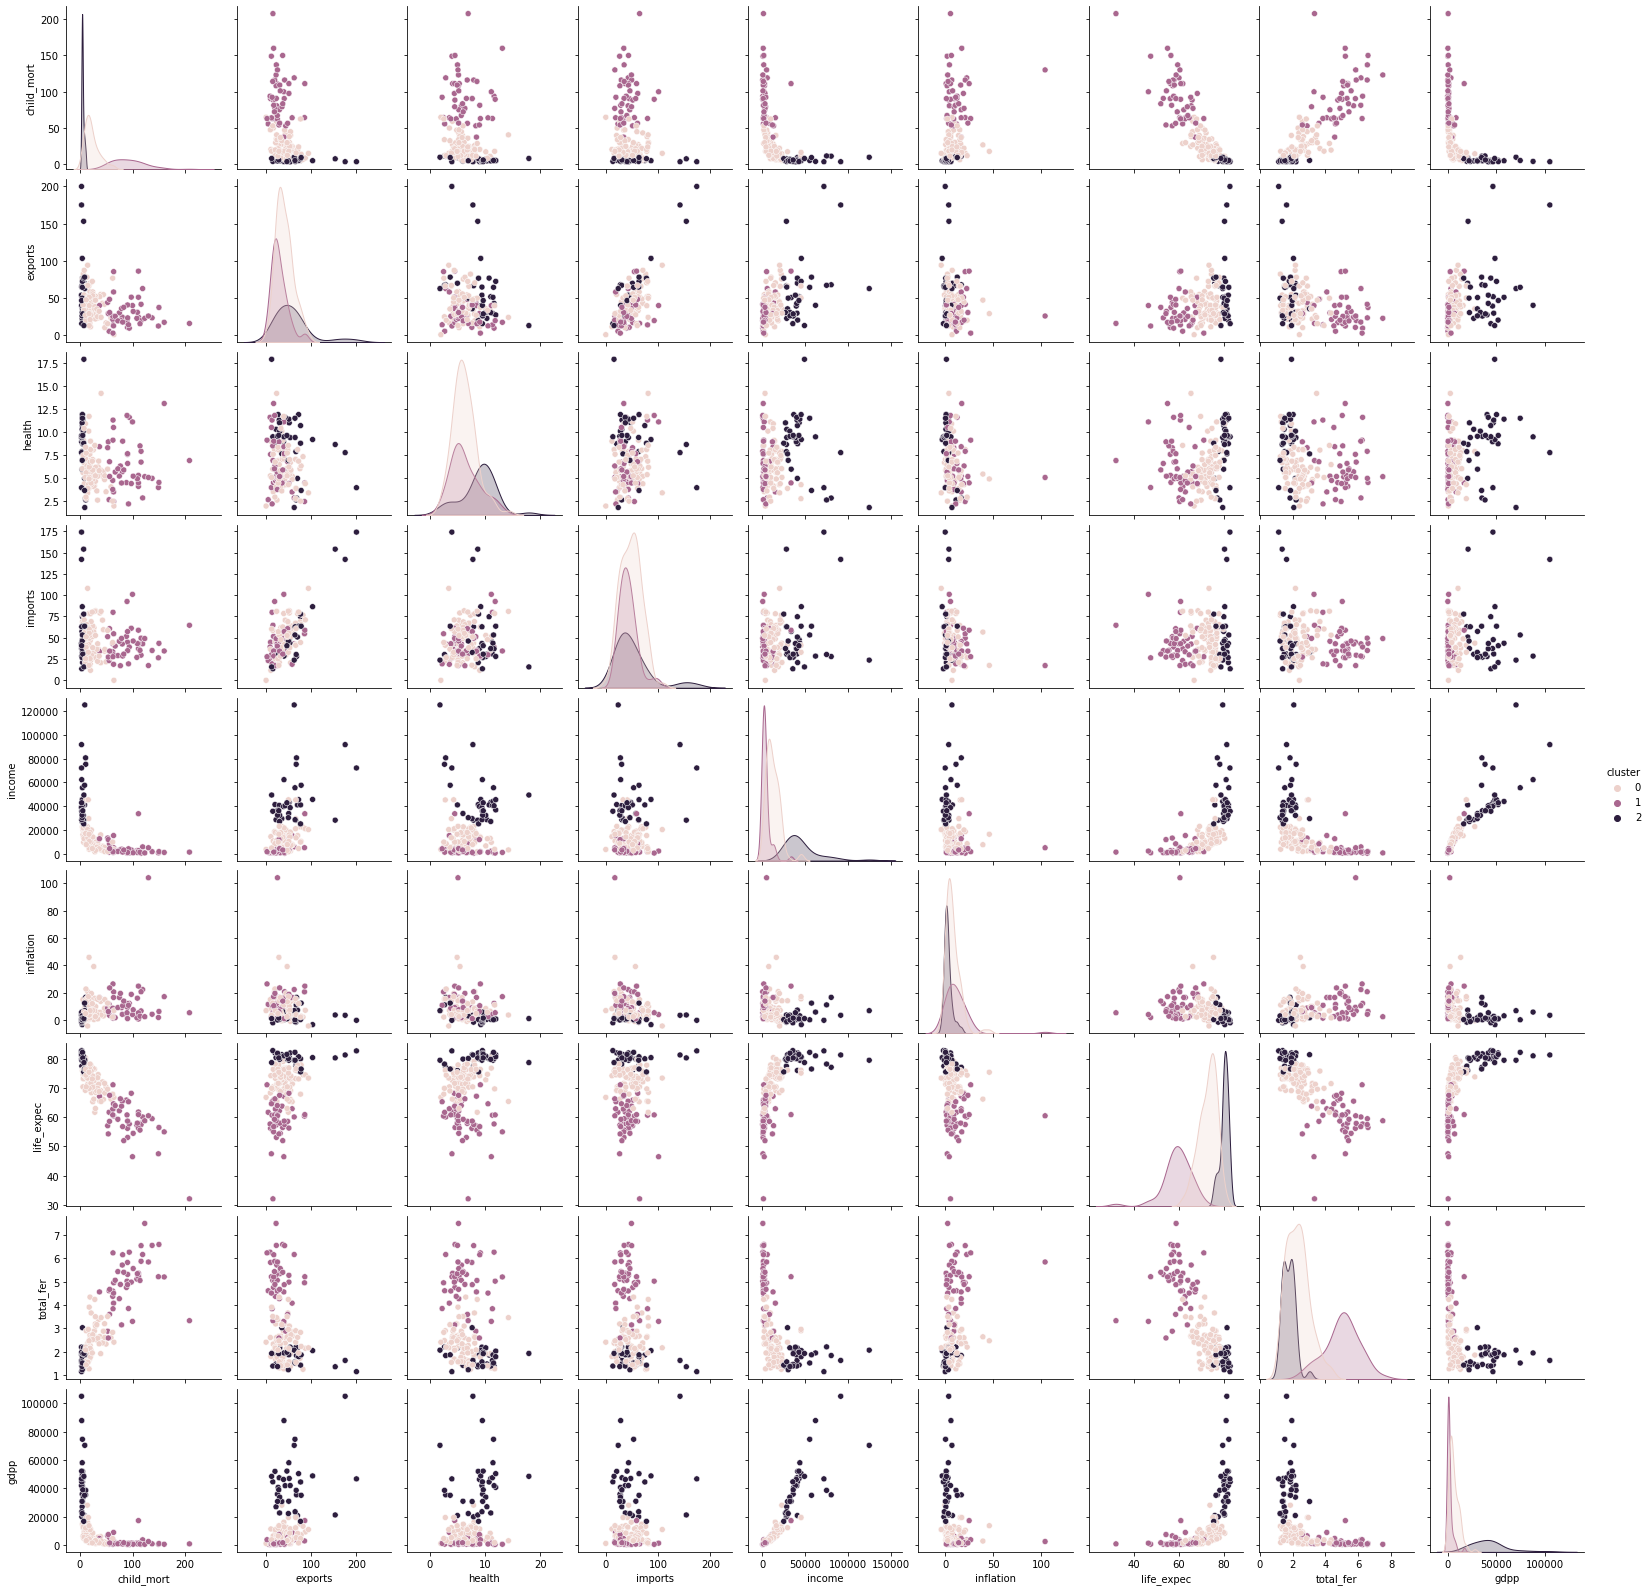

In [36]:
sns.pairplot(data,hue = 'cluster')

In [47]:
from sklearn.cluster import DBSCAN
# # cluster the data into five clusters
# dbscan = DBSCAN(eps = 8, min_samples = 4).fit(data2) # fitting the model
# labels = dbscan.labels_ # getting the labels

In [38]:
# # add cluster column to original dataset with countries and non-scaled values
# df['labels_db'] = labels.tolist()
# data = df
# # data.head()

In [39]:
# Plot the clusters
# plotting the clusters with seaborn
# sns.scatterplot(x="income", y="inflation", hue="labels", data=dataset)

## Model: Agglomerative Clustering

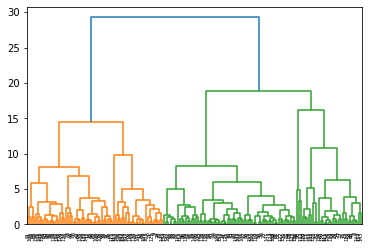

In [40]:
dendrogram = sch.dendrogram(sch.linkage(data2, method='ward'))

In [41]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(data2)
labels = model.labels_
labels

array([1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 1, 1], dtype=int64)

In [42]:
# add cluster column to original dataset with countries and non-scaled values
df['labels_hc'] = labels.tolist()
data = df
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,labels_hc
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,2


In [43]:
# table of clusters showing mean values per cluster and per feature
clusters_table = pd.pivot_table(data, index=['labels_hc'])
clusters_table

,child_mort,cluster,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
labels_hc,,,,,,,,,,
0,6.003030,1.818182,59.221212,43551.515152,8.527576,49.387879,48133.333333,4.186576,79.939394,1.853939
1,74.598529,0.691176,28.876456,2588.058824,6.054706,39.461263,5582.250000,13.080809,62.492647,4.284265
2,16.974242,0.181818,44.656061,8361.000000,6.743788,53.295455,13563.181818,4.119909,74.171212,2.118182


<AxesSubplot:xlabel='income', ylabel='child_mort'>

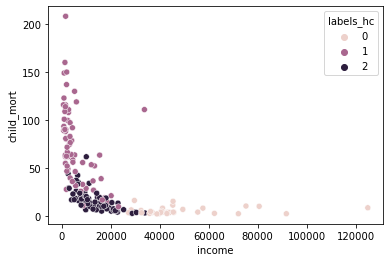

In [44]:
# plotting the clusters with seaborn
sns.scatterplot(x="income", y="child_mort", hue="labels_hc", data=data)

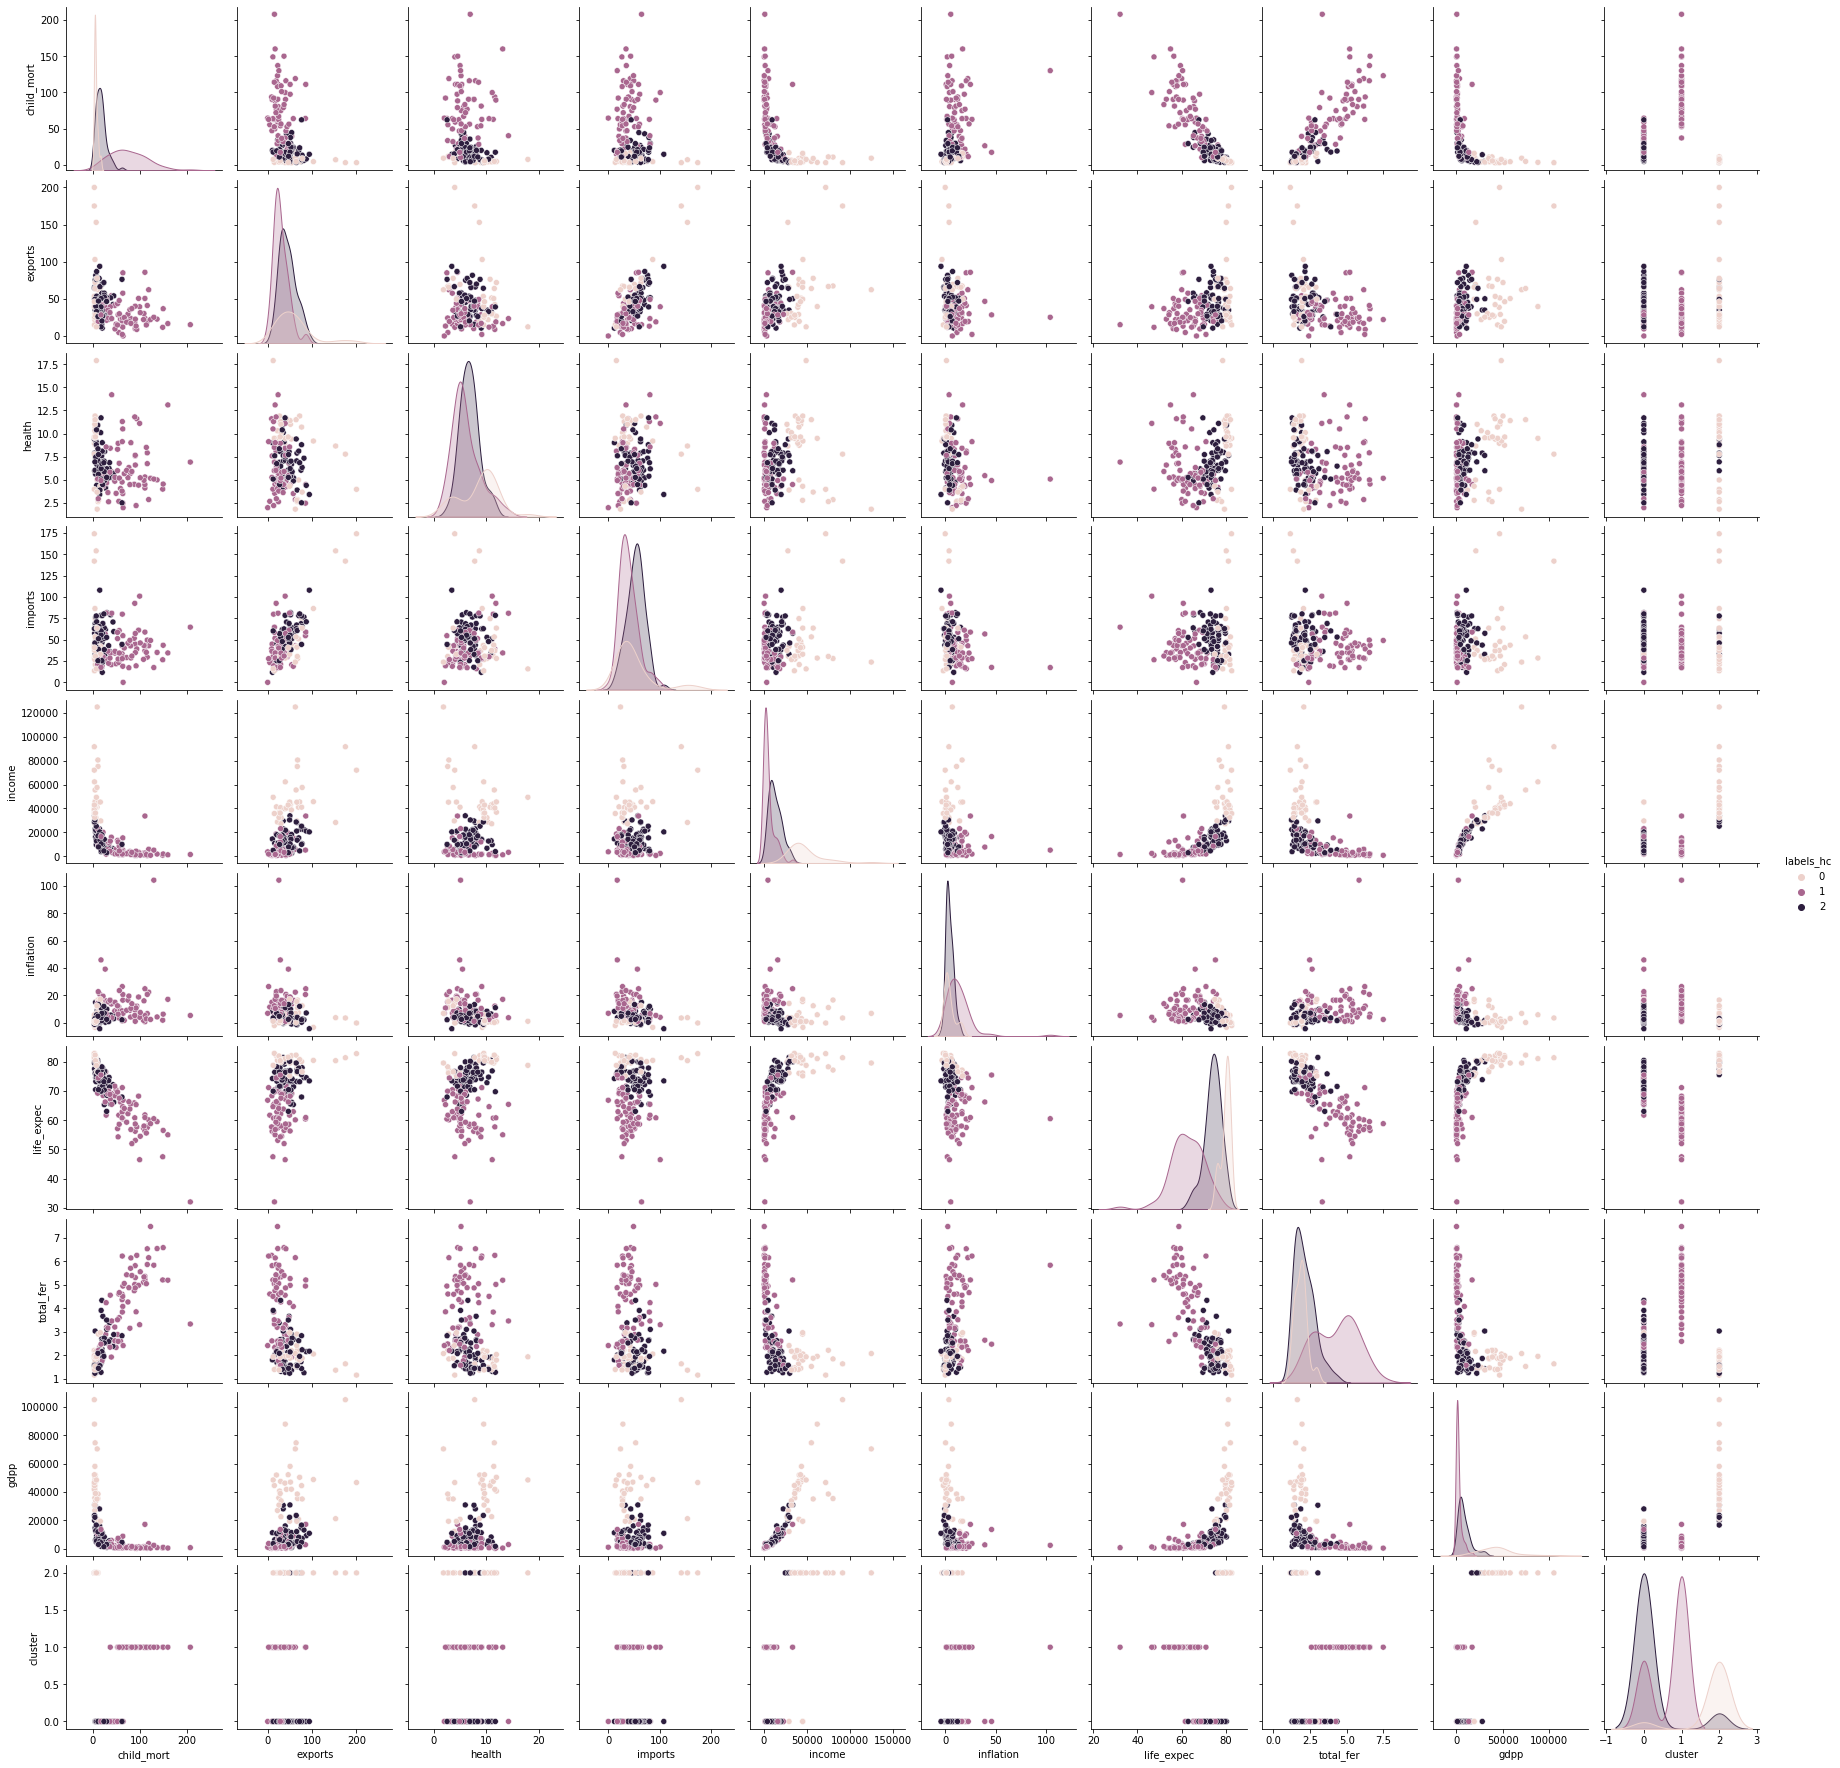

In [51]:
sns.pairplot(data,hue = 'labels_hc')

In [53]:
# cluster 0 
cluster_0 = data.loc[data['labels_hc'] == 0]

# list of countries in this country
cluster_0.country.unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Kuwait', 'Libya', 'Luxembourg',
       'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Oman',
       'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore', 'Spain',
       'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [54]:
# cluster 1 
cluster_1 = data.loc[data['labels_hc'] == 1]

# list of countries in this country
cluster_1.country.unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Azerbaijan',
       'Bangladesh', 'Benin', 'Bolivia', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Egypt', 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Kazakhstan', 'Kenya', 'Kiribati', 'Lao',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines',
       'Russia', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'South Africa', 'Sri Lanka', 'Sudan', 'Tajikistan', 'Tanzania',
       'Timor-Leste', 'Togo', 'Uganda', 'Uzbekistan', 'Venezuela',
       'Yemen', 'Zambia'], dtype=object)

In [55]:
# cluster 2 
cluster_2 = data.loc[data['labels_hc'] == 2]

# list of countries in this country
cluster_2.country.unique()
Cluster 0: This cluster is characterised by showing average values for all features when comparing with other clusters.

array(['Albania', 'Antigua and Barbuda', 'Armenia', 'Bahamas', 'Barbados',
       'Belarus', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji',
       'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Israel',
       'Jamaica', 'Jordan', 'Kyrgyz Republic', 'Latvia', 'Lebanon',
       'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Moldova', 'Montenegro', 'Morocco', 'Panama', 'Paraguay', 'Peru',
       'Poland', 'Romania', 'Samoa', 'Serbia', 'Seychelles',
       'Slovak Republic', 'Slovenia', 'South Korea',
       'St. Vincent and the Grenadines', 'Suriname', 'Thailand', 'Tonga',
       'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uruguay',
       'Vanuatu', 'Vietnam'], dtype=object)

## CONCLUSION

#### On applying three clustering models we came to a conclusion that:
    DBSCAN- did not perform well on this dataset as it was giving only -1 as labels and therefore was not being able to find clusters in the data.
    The results between k-means and hierarchical clustering were not simila, K means provided better clusters whereas the clusters by agglomerative were overlapping. 
    The advantage of K-means clustering is that it tends to produce more accurate results.Therefore we choose K-MEANS model.